# DATA DIVISSION

## DATA FILES
KDDTrain+.ARFF: The full NSL-KDD train set with binary labels in ARFF format
KDDTrain+.TXT: The full NSL-KDD train set including attack-type labels and difficulty level in CSV format
KDDTrain+_20Percent.ARFF: A 20% subset of the KDDTrain+.arff file
KDDTrain+_20Percent.TXT: A 20% subset of the KDDTrain+.txt file
KDDTest+.ARFF: The full NSL-KDD test set with binary labels in ARFF format
KDDTest+.TXT: The full NSL-KDD test set including attack-type labels and difficulty level in CSV format
KDDTest-21.ARFF: A subset of the KDDTest+.arff file which does not include records with difficulty level of 21 out of 21
KDDTest-21.TXT: A subset of the KDDTest+.txt file which does not include records with difficulty level of 21DOWNLOAD DATAE DATOS

https://iscxdownloads.cs.unb.ca/iscxdownloads/NSL-KDD/#NSL-KDD
CISDA), 2009

# 1. READING DATA
We use the arff and pandas libraries to put all the data into a dataframe from a file in arff format. We create a function for this purpose and obtain information from the data.

In [1]:
import arff
import pandas as pd

In [4]:
def obtener_dataset(data_path):
    """Reading Data NSL-KDD."""
    with open(data_path, 'r') as train_set:
        dataset = arff.load(train_set)
    attributes = [attr[0] for attr in dataset["attributes"]]
    return pd.DataFrame(dataset["data"], columns=attributes)

ruta="../../datasets/NSL-KDD/KDDTrain+.arff"

In [5]:
df_crudo=obtener_dataset(ruta)

In [6]:
df_crudo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  float64
 5   dst_bytes                    125973 non-null  float64
 6   land                         125973 non-null  object 
 7   wrong_fragment               125973 non-null  float64
 8   urgent                       125973 non-null  float64
 9   hot                          125973 non-null  float64
 10  num_failed_logins            125973 non-null  float64
 11  logged_in                    125973 non-null  object 
 12  num_compromised              125973 non-null  float64
 13 

# 2. DATA SPLITTING

We are going to perform data splitting. We will work with two partitioning methods, random and stratified. Both are methods contained in the sklearn library.

## ALEATORY SPLITTING

We use train_set_split function. Using a percenteage (one-to-one) of the test_set 

In [7]:
# From data we take 60% for training set and the rest for test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_crudo, test_size=0.4, random_state=42)

In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75583 entries, 98320 to 121958
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     75583 non-null  float64
 1   protocol_type                75583 non-null  object 
 2   service                      75583 non-null  object 
 3   flag                         75583 non-null  object 
 4   src_bytes                    75583 non-null  float64
 5   dst_bytes                    75583 non-null  float64
 6   land                         75583 non-null  object 
 7   wrong_fragment               75583 non-null  float64
 8   urgent                       75583 non-null  float64
 9   hot                          75583 non-null  float64
 10  num_failed_logins            75583 non-null  float64
 11  logged_in                    75583 non-null  object 
 12  num_compromised              75583 non-null  float64
 13  root_shell      

In [8]:
test_set, validation_set = train_test_split(test_set, test_size=0.5, random_state=42)

Now we will examine the properties of the validation test and the lengths of all sets, as well as the data dispersion of a class-type feature.

In [9]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25195 entries, 115297 to 79319
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25195 non-null  float64
 1   protocol_type                25195 non-null  object 
 2   service                      25195 non-null  object 
 3   flag                         25195 non-null  object 
 4   src_bytes                    25195 non-null  float64
 5   dst_bytes                    25195 non-null  float64
 6   land                         25195 non-null  object 
 7   wrong_fragment               25195 non-null  float64
 8   urgent                       25195 non-null  float64
 9   hot                          25195 non-null  float64
 10  num_failed_logins            25195 non-null  float64
 11  logged_in                    25195 non-null  object 
 12  num_compromised              25195 non-null  float64
 13  root_shell      

In [10]:
validation_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25195 entries, 34615 to 84708
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25195 non-null  float64
 1   protocol_type                25195 non-null  object 
 2   service                      25195 non-null  object 
 3   flag                         25195 non-null  object 
 4   src_bytes                    25195 non-null  float64
 5   dst_bytes                    25195 non-null  float64
 6   land                         25195 non-null  object 
 7   wrong_fragment               25195 non-null  float64
 8   urgent                       25195 non-null  float64
 9   hot                          25195 non-null  float64
 10  num_failed_logins            25195 non-null  float64
 11  logged_in                    25195 non-null  object 
 12  num_compromised              25195 non-null  float64
 13  root_shell       

In [10]:
print ("Training set size is: ", len(train_set))
print ("Test set size iss: ", len(test_set))
print ("Validation set size is: ", len(validation_set))

Training set size is:  75583
Test set size iss:  25195
Validation set size is:  25195


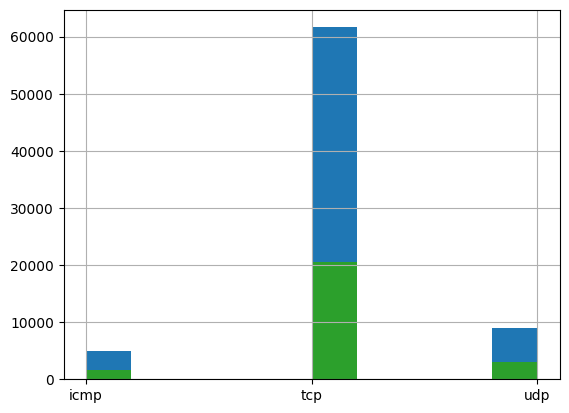

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

data_list = [train_set,test_set,validation_set]

for data in data_list:
    data["protocol_type"].hist()

## ALEATORY SPLITTING

The train_set_split function has the shuffle option. When the value of this option is FALSE, many partitions can be made without fear of including all the data from the dataset in the train_set. This undesirable effect would generate an algorithm that fits the dataset very well but not efficiently to new data.

In [12]:
train_set, test_set = train_test_split(df_crudo, test_size=0.4, random_state=42, shuffle=False)

In [13]:
# Splitting where stratification is done based on a protocol type feature
train_set, test_set = train_test_split(df_crudo, test_size=0.4, random_state=42, stratify=df_crudo["protocol_type"])

In [14]:
test_set, validation_set = train_test_split(test_set, test_size=0.5, random_state=42, stratify=test_set["protocol_type"])

In [15]:
print ("Training set size is: ", len(train_set))
print ("Test set size is: ", len(test_set))
print ("Validation set size iss: ", len(validation_set))

Training set size is:  75583
Test set size is:  25195
Validation set size iss:  25195


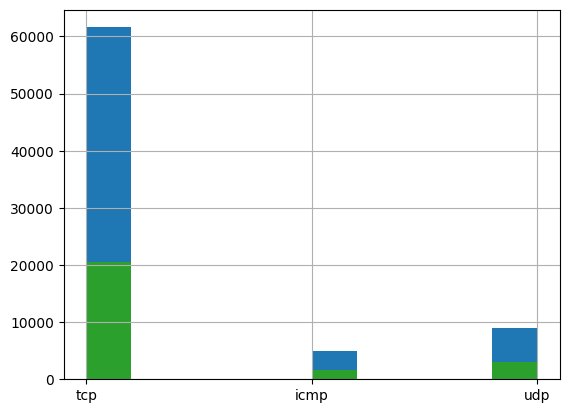

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

data_list = [train_set,test_set,validation_set]

for data in data_list:
    data["protocol_type"].hist()